# Data Collection and Early Data Processing

## Data Collection Goal

The goal is to first collect around 1,000 reviews for each rating from 1-star to 5-star. A preliminary search was conducted on Amazon's website for 'masks' and related keywords such as 'covid', 'N95', 'medical', and 'reusable'.

While there are many pages of products available in the search result, only a handful had a reasonable number of reviews (m>500). Some products were duplicates in the search results, so a manual inspection is required.

The following products were selected to be sampled based on the number of reviews available. Variation of mask characteristics and features was also taken into account.

| PRODUCT ID | PRODUCT NAME |
| :---------- | :------------ |
| B088825ZVV | Weddingstar 3-Ply Adult Washable Cloth Face Mask Reusable and Adjustable with Filter Pocket|
| B08DPTLW6G | Black-Face-Mask-Pack-Comfortable|
| B088K9GDN5 | THINKA-PROCEDURE-MASK-EARLOOPS-50pcs|
| B0891VVHN1 | Case-Mate-Washable-Reusable-Cotton-Filter|
| B088C2WD5F | EnerPlex-Premium-3-Ply-Reusable-Face|
| B08HWVSSPZ | Designer-Female-Fashion-Cotton-Fabric |
| B08B9BQNSY | Levis-Re-Usable-Reversible-Bandana-Caviar |
| B08P56BK1J | Under-Armour-unisex-adult-Sports-Mask |
| B086R5TCNK | Windproof-Dustproof-Breathable-Reusable-Outdoor |
| B088JY3QQD | EnerPlex-Premium-Kids-3-Ply-Reusable |
| B088YV7VCF | Gildan-Reusable-Everyday-2-Layer-Cotton |
| B08793KQ18 | TRAVLEISURE-ADJUSTABLE-REUSABLE-WASHABLE-FACE |
| B07Y2XFQMM | FCY-Balaclava-Winter-Fleece-Windproof |
| B088CV63D6 | EnerPlex-Premium-3-Ply-Reusable-Face |
| B0884VL4ZR | Perry-Ellis-Reusable-Rounded-Assorted |
| B088YS4738 | Fashion-Protective-Washable-Reusable-Elastic |
| B084TJDDL1 | AstroAI-Reusable-Dust-Face-Filters |

## Features

The features necessary for sentiment analysis are:
1. rating (ordinal, from 1 to 5)
2. title (string)
3. review (string)

Date and location were features readily available. They were scraped for EDA (exploratory data analysis).

## Webscraping Using Selenium

Selenium WebDriver is a collection of open-source APIs used to automate the testing of a web application. This tool was selected over other methods for its ease of use. I have tried using scrappy spider in the past, and found through experience that Amazon does not like to be scraped. It will detect bots and block the IP. While a VPN could be used, it unnecessarily complicates the data collection process.

The review section for each product consists of ten reviews per page. Each review consists of a star rating, a review title, a review text, a location, and the date of the review.

The entire process took around 3.5 hours to complete, including manually selecting products.

The webscraping was performed on February 8th, 2021. Products and reviews may change.

## Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import selenium
from selenium import webdriver
from selenium.webdriver.support.ui import Select
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import NoSuchElementException

import time #pausing
import datetime #timestamp log
import os #file management
import json 
import csv

## Chrome WebDriver

Using chrome webdriver for automation of scraping in conjunction with manual product selection. 

In [66]:
driver = webdriver.Chrome();
driver.get("https://www.amazon.ca/Weddingstar-Washable-Reusable-Adjustable-Protective/product-reviews/B088825ZVV/ref=cm_cr_getr_d_paging_btm_prev_" + str(pg+1) + "?pageNumber=" + str(pg+1))

## Web Scraping

1. For each page, identify the 10 reviews. 
2. Scrape the title, date, location, review, and rating. 
3. Save in CSV file as 'review_raw.csv'. 
4. Find the button for the next page.
5. Wait for 3 seconds for the page to load.
6. Repeat the process until the 'next page' button is no longer available.

In [191]:
for i in range(200):
    for r in driver.find_elements_by_class_name("review"):
        title = r.find_element_by_class_name("review-title-content").text
        reviewDate = r.find_element_by_class_name("review-date").text.split()
        location = reviewDate[2]
        date = ' '.join(reviewDate[-3:]) # change later
        review = r.find_element_by_class_name("review-text").text
        rating = r.find_element_by_xpath('.//span[@class="a-icon-alt"]').get_attribute('textContent')[0]

        fields = [rating, title, review, location, date]
        with open(r'review_raw.csv','a') as f:
            writer = csv.writer(f)
            writer.writerow(fields)
                
    driver.find_element_by_partial_link_text('Next page').click()
    
    time.sleep(3)

page:  0
page:  1
page:  2
page:  3
page:  4
page:  5
page:  6
page:  7
page:  8
page:  9
page:  10
page:  11
page:  12
page:  13
page:  14
page:  15
page:  16
page:  17
page:  18
page:  19
page:  20
page:  21
page:  22
page:  23
page:  24
page:  25
page:  26
page:  27
page:  28
page:  29


NoSuchElementException: Message: no such element: Unable to locate element: {"method":"partial link text","selector":"Next page"}
  (Session info: chrome=88.0.4324.146)


In [309]:
driver.quit()

## Oversampling to Balance the Data

After collecting around 3,000 reviews, a value count of frequency by rating showed that the data is highly unbalanced, with a tendency to skew towards higher ratings. There are 1,773 five-star reviews, which made up 57% of all reviews. This is unsurprising since a positive review will attract more customers, who will leave more reviews.  And only products with abundant reviews were sampled.

After around 3,000 reviews were collected, oversampling for star ratings below 5 is necessary to even out the sample. The least frequent star rating was 2. Many products were sampled solely to collect more 2-star ratings. 

On average, 1860 samples were collected for each rating.


In [346]:
df = pd.read_csv('review_raw.csv', header=None)
df.iloc[:,0].value_counts()

1    1973
2    1848
5    1846
3    1827
4    1805
Name: 0, dtype: int64

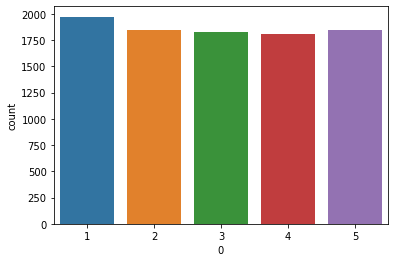

In [8]:
plt.figure()
sns.countplot(x='0',data=df)
plt.show()

In [347]:
df.shape

(9299, 5)

In [348]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9299 entries, 0 to 9298
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       9299 non-null   int64 
 1   1       9293 non-null   object
 2   2       9295 non-null   object
 3   3       9299 non-null   object
 4   4       9299 non-null   object
dtypes: int64(1), object(4)
memory usage: 363.4+ KB


In [349]:
df.tail()

,0,1,2,3,4
9294,2,Just okay.,Poor stitching work on both of the mask ordered.,the,"May 23, 2020"
9295,2,Disappointed,Waste of money,the,"July 2, 2020"
9296,2,Improvement required as ear loop should be adj...,Dislike.,the,"July 22, 2020"
9297,2,"Nasenclip nicht entfernbar, trotz Angabe auf V...",Also generell wäre es eine tolle Maske. Aber i...,Germany,"July 31, 2020"
9298,2,Schlechter als jede Stoffmaske,Das beste zuerst. Es ist eine Maske. Für den P...,Germany,"October 4, 2020"


## Saving the Data

In [27]:
df.to_csv(r'data/raw.csv', index=False)